#### SECTION A BATCH 1
#### WEEK 3 DATE: 31 MARCH 2022
## EXER 1

In [183]:
# Import required libraries

# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.preprocessing import (LabelEncoder, OneHotEncoder,
StandardScaler, MinMaxScaler)

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report)

# Pipelines
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB

In [184]:
# Importing the dataset.
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [185]:
df.shape

(891, 12)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Both 'ParCh' and 'SibSp' attributes indicate the count of family size, hence we can merge them into a single attribute and drop them.

In [187]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 6. Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.

In [188]:
# Checking the count of the missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

We can Observe that there are many missing values in the 'Cabin' attribute and less missing values in 'Age' & 'Embarked' attributes.

In [189]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

##### As the attribute 'Embarked' is categorical, we can replace it's null values with mode.

In [190]:
pd.DataFrame(df['Embarked'].value_counts())

,Embarked
S,644
C,168
Q,77


<AxesSubplot:xlabel='Embarked', ylabel='count'>

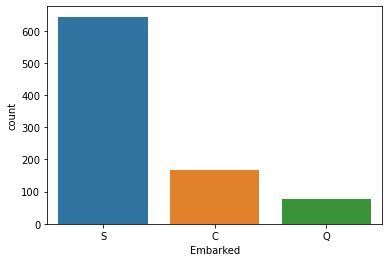

In [191]:
sns.countplot(x = "Embarked",data = df)

In [192]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()

0

##### Lets fill the missing values in 'Age' using interpolate function of pandas.

In [193]:
df['Age'] = df['Age'].interpolate()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

##### We can drop the irrelavent attributes such as 'Name', 'Ticket', 'PassengerId' and especially 'Cabin' which has many missing values.

In [194]:
cols = ['Name','Ticket','PassengerId','Cabin','SibSp','Parch']
df.drop(cols,axis = 1,inplace = True)

In [195]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

### 7. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step.

In [208]:
num = ['Age','Fare','FamilySize','Pclass']
cat = ['Sex','Embarked']

In [209]:
pipeline = Pipeline([('scaler1', StandardScaler(),num),
                    ('onehotencoding1',OneHotEncoder(),cat),
                    ('classifier',GaussianNB())])

In [210]:
x = df.drop(["Survived"], axis = 1)
y = df.Survived
y = LabelEncoder().fit_transform(y)

In [211]:
scores = cross_val_score(pipeline,x,y,cv=5)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 340, in fit
    fit_params_steps = self._check_fit_params(**fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 250, in _check_fit_params
    fit_params_steps = {name: {} for name, step in self.steps
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 250, in <dictcomp>
    fit_params_steps = {name: {} for name, step in self.steps
ValueError: too many values to unpack (expected 2)

  warnings.warn("Estimator fit failed. The score on

array([nan, nan, nan, nan, nan])

### 8. Perform Bayes classification using cross validation.

### 9. Tabulate using relevant measures of accuracy , Sensitivity and specificity.

### 10. Visualize the ROC curve and comment on performance

## EXER 2

### 5. Preprocessing: 
 a. Find any null values are present or not, If present remove those data.
 
 b. Remove the data that have less than 5 reviews.
 
 c. Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.

### 6. Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).

### 7. Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended

### 8. Tabulate accuracy in terms of precision, recall and F1 score.